<a href="https://colab.research.google.com/github/nourankh1/heart-failure-prediction/blob/main/DS_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
dataSet = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")


In [ ]:
# a) Display the first and last 12 rows
print(dataSet.head(12))
print(dataSet.tail(12))

    Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0   Female   21    1.62    64.0                            yes   no   2.0   
1   Female   21    1.52    56.0                            yes   no   3.0   
2     Male   23    1.80    77.0                            yes   no   2.0   
3     Male   27    1.80    87.0                             no   no   3.0   
4     Male   22    1.78    89.8                             no   no   2.0   
5     Male   29    1.62    53.0                             no  yes   2.0   
6   Female   23    1.50    55.0                            yes  yes   3.0   
7     Male   22    1.64    53.0                             no   no   2.0   
8     Male   24    1.78    64.0                            yes  yes   3.0   
9     Male   22    1.72    68.0                            yes  yes   2.0   
10    Male   26    1.85   105.0                            yes  yes   3.0   
11  Female   21    1.72    80.0                            yes  yes   2.0   

In [ ]:
# b) Identify total number of rows and columns
print("Total Rows:", dataSet.shape[0])
print("Total Columns:", dataSet.shape[1])

Total Rows: 2111
Total Columns: 17


In [ ]:
# c) List column names with data types
print(dataSet.dtypes)

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [ ]:
# d) Print the name of the first column
print("First Column Name:", dataSet.columns[0])

First Column Name: Gender


In [ ]:
# e) Summary of dataset
print(dataSet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
# f) Choose a categorical attribute  and display distinct values
print("Distinct Genders:", dataSet["Gender"].unique())

Distinct Genders: ['Female' 'Male']


In [ ]:
# g) Most frequently occurring value in Gender
print("Most Frequent Gender:", dataSet["Gender"].mode()[0])

Most Frequent Gender: Male


In [ ]:
# h) Mean, Median, Standard Deviation, and Percentiles (e.g., Weight )
print("Mean Weight :", dataSet["Weight"].mean())
print("Median Weight :", dataSet["Weight"].median())
print("Standard Deviation of Weight :", dataSet["Weight"].std())
print("20th Percentile of Weight :", np.percentile(dataSet["Weight"], 20))

Mean Weight : 86.58603505447655
Median Weight : 83.0
Standard Deviation of Weight : 26.19116271053226
20th Percentile of Weight : 60.63


In [ ]:
                          # Data Preparation (a->h)
# a) Filter rows where Weight is greater than 80
resultedDataset = dataSet[dataSet["Weight"] > 80]
print(resultedDataset)

      Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
3       Male   27    1.80   87.00                             no   no   3.0   
4       Male   22    1.78   89.80                             no   no   2.0   
10      Male   26    1.85  105.00                            yes  yes   3.0   
13      Male   41    1.80   99.00                             no  yes   2.0   
16      Male   27    1.93  102.00                            yes  yes   2.0   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71  131.41                            yes  yes   3.0   
2107  Female   22    1.75  133.74                            yes  yes   3.0   
2108  Female   23    1.75  133.69                            yes  yes   3.0   
2109  Female   24    1.74  133.35                            yes  yes   3.0   
2110  Female   24    1.74  133.47                            yes  yes   3.0   

      NCP        CAEC SMOKE  CH2O SCC   FAF    TUE 

In [ ]:
# b)Identify records where a chosen attribute starts with a specific letter and count how many records match this condition.
startsWithF = dataSet[dataSet["Gender"].str.startswith("F")]
print("Number of Records where Gender starts with F:", len(startsWithF))


Number of Records where Gender starts with F: 1043


In [ ]:
# c) Determine the total number of duplicate rows and remove them if found.
duplicates = dataSet.duplicated().sum()
print("Total Duplicate Rows:", duplicates)
print(dataSet)
print("-----------------------------------------------------")
theNewDataSet = dataSet.drop_duplicates()
duplicates = theNewDataSet.duplicated().sum()
print("Total Duplicate Rows After removal:", duplicates)
print(theNewDataSet)

Total Duplicate Rows: 24
      Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62   64.00                            yes   no   2.0   
1     Female   21    1.52   56.00                            yes   no   3.0   
2       Male   23    1.80   77.00                            yes   no   2.0   
3       Male   27    1.80   87.00                             no   no   3.0   
4       Male   22    1.78   89.80                             no   no   2.0   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71  131.41                            yes  yes   3.0   
2107  Female   22    1.75  133.74                            yes  yes   3.0   
2108  Female   23    1.75  133.69                            yes  yes   3.0   
2109  Female   24    1.74  133.35                            yes  yes   3.0   
2110  Female   24    1.74  133.47                            yes  yes   3.0   

      NCP       CAEC SMOKE

In [ ]:
#  d) Convert the data type of a numerical column from integer to string.

dataSet["Age"] = dataSet["Age"].astype("string")  # Converts object to string dtype
print(dataSet.dtypes)
print(dataSet.Age)


Gender                                    object
Age                               string[python]
Height                                   float64
Weight                                   float64
family_history_with_overweight            object
FAVC                                      object
FCVC                                     float64
NCP                                      float64
CAEC                                      object
SMOKE                                     object
CH2O                                     float64
SCC                                       object
FAF                                      float64
TUE                                      float64
CALC                                      object
MTRANS                                    object
NObeyesdad                                object
dtype: object
0       21
1       21
2       23
3       27
4       22
        ..
2106    21
2107    22
2108    23
2109    24
2110    24
Name: Age, Length: 2111, dtype: 

In [ ]:
# e) Group the dataset based on two selected categorical features and analyze the results.
groupedDataSet = dataSet.groupby(["Gender", "family_history_with_overweight"]).size()
print(groupedDataSet)


Gender  family_history_with_overweight
Female  no                                232
        yes                               811
Male    no                                153
        yes                               915
dtype: int64


Analyzing the results of e) :
Total Females = 232 + 811 = 1,043
Total Males = 153 + 915 = 1,068
Females with family_history_with_overweight =811 / 1043 ≈ 77.7%
Male with family_history_with_overweight =915 / 1068 ≈ 85.7%
therefore Males (85.7%) are more likely to report a family history than females (77.7%).

In [ ]:
# f) Check for the existence of missing values within the dataset.
print(dataSet.isnull().sum())


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
#  -- h) Divide a chosen numerical column into 5 equal-width bins and count the number of records in each bin.
dataSet["Height_Bins"] = pd.cut(dataSet["Height"], bins=5)
print(dataSet["Height_Bins"].value_counts()) #.value_counts tells how many values (no. of rows)that lie in each bin


Height_Bins
(1.662, 1.768]    777
(1.556, 1.662]    647
(1.768, 1.874]    505
(1.449, 1.556]    134
(1.874, 1.98]      48
Name: count, dtype: int64


In [ ]:
# i) Row with maximum Height
print(dataSet[dataSet["Height"] == dataSet["Height"].max()])

     Gender Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
349    Male  20    1.98   125.0                            yes  yes   2.0   
1350   Male  20    1.98   120.7                            yes  yes   2.0   

      NCP       CAEC SMOKE  CH2O SCC   FAF  TUE       CALC  \
349   3.0     Always    no   3.0  no  1.00  1.0  Sometimes   
1350  3.0  Sometimes    no   3.0  no  0.77  1.0  Sometimes   

                     MTRANS      NObeyesdad    Height_Bins  
349   Public_Transportation  Obesity_Type_I  (1.874, 1.98]  
1350  Public_Transportation  Obesity_Type_I  (1.874, 1.98]  


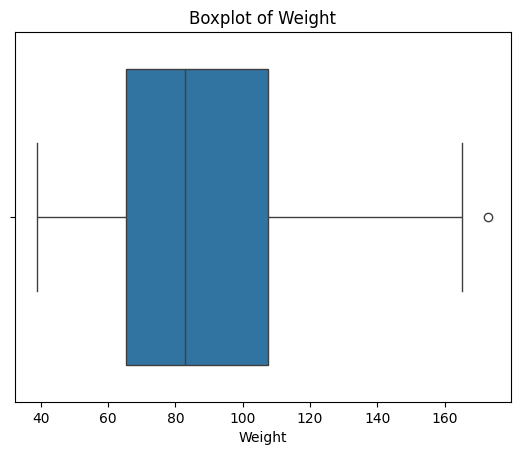

In [ ]:
# j) Boxplot for Weight(as the Weight is the main factor of our dataSet)
sns.boxplot(x=dataSet["Weight"])
plt.title("Boxplot of Weight")
plt.show()

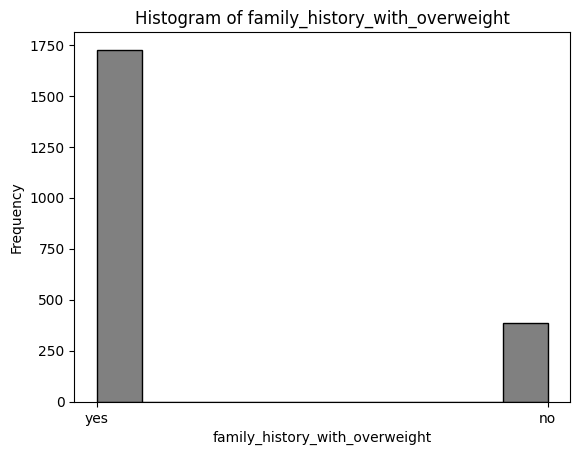

In [ ]:
# k) Histogram for family_history_with_overweight(as it makes individuals more prone to obesity)
plt.hist(dataSet["family_history_with_overweight"], bins=10, color='grey', edgecolor='black')
plt.title("Histogram of family_history_with_overweight")
plt.xlabel("family_history_with_overweight")
plt.ylabel("Frequency")
plt.show()

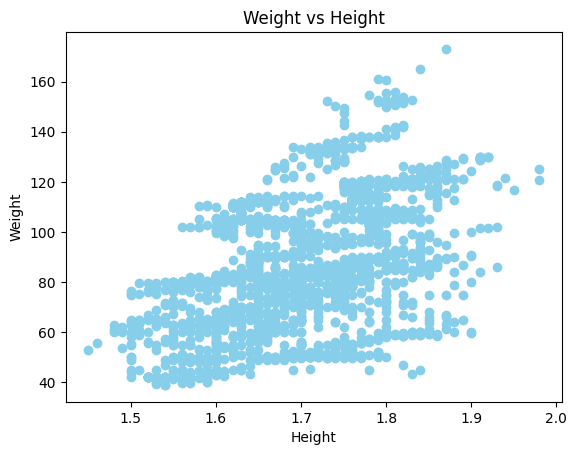

In [ ]:
# l) Scatterplot for Weight vs Height(The scatterplot shows a positive correlation,where as height increases, weight increases.)
plt.scatter(dataSet["Height"], dataSet["Weight"], color='skyblue')
plt.title("Weight vs Height")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [ ]:
# save the weight and height values before standardization for using them in the BMI calculation
weight_original = dataSet["Weight"]
height_original = dataSet["Height"]
# m) Normalize Numerical Columns
scaler = StandardScaler()
dataSet[["Weight", "Height"]] = scaler.fit_transform(dataSet[["Weight", "Height"]])
print(dataSet[["Weight", "Height"]])

        Weight    Height
0    -0.862558 -0.874380
1    -1.168077 -1.945660
2    -0.366089  1.053924
3     0.015809  1.053924
4     0.122741  0.839668
...        ...       ...
2106  1.711821  0.089772
2107  1.800804  0.518284
2108  1.798894  0.518284
2109  1.785909  0.411156
2110  1.790492  0.411156

[2111 rows x 2 columns]


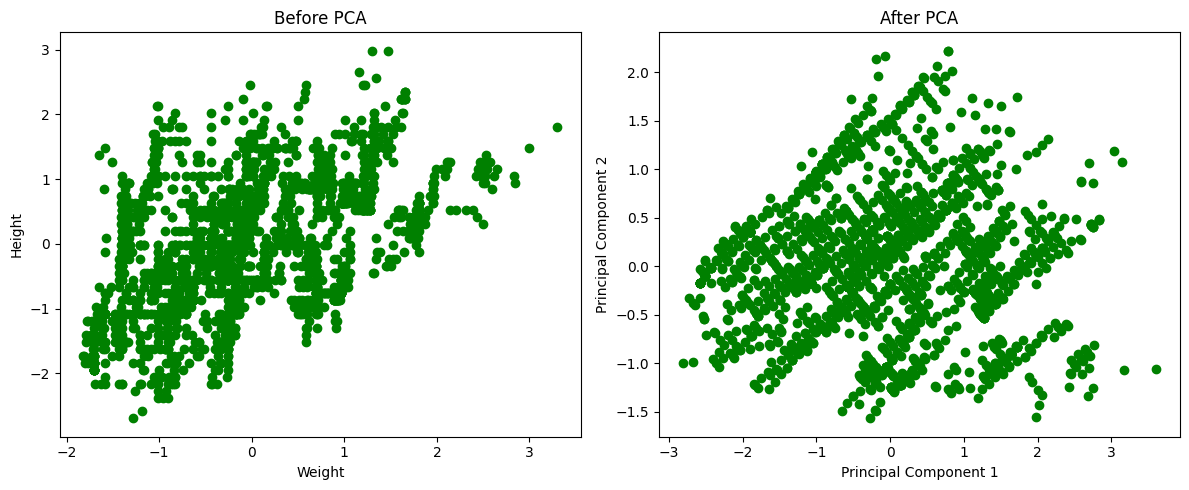

In [ ]:
#n)
# Before PCA Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(dataSet["Weight"], dataSet["Height"], c='green')
plt.title("Before PCA")
plt.xlabel("Weight")
plt.ylabel("Height")

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_data = pca.fit_transform(dataSet[["Weight", "Height"]])

# After PCA Visualization
plt.subplot(1, 2, 2)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='green')
plt.title("After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()


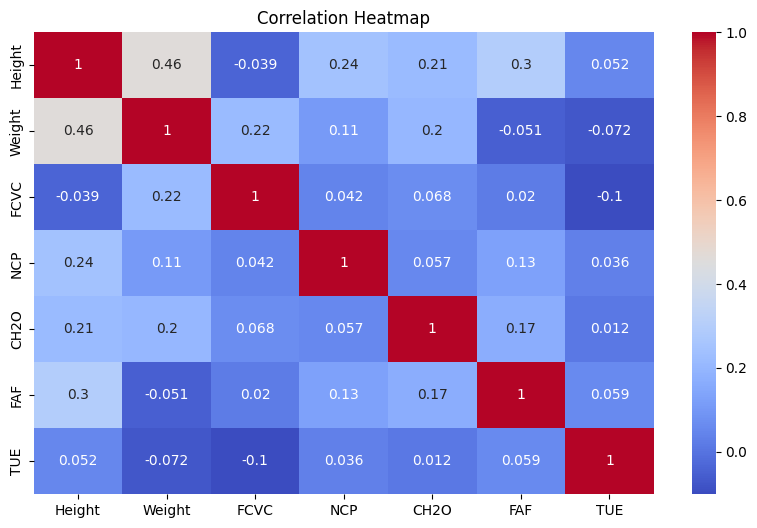

In [ ]:
#o)
numericalDataSet = dataSet.select_dtypes(include=["float64", "int64"]) #selects only the numerical columns from the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(numericalDataSet.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

                                  Gender       Age    Height    Weight  \
Gender                          1.000000  0.048682  0.618145  0.161665   
Age                             0.048682  1.000000 -0.025775  0.203451   
Height                          0.618145 -0.025775  1.000000  0.462264   
Weight                          0.161665  0.203451  0.462264  1.000000   
family_history_with_overweight  0.102512  0.205494  0.247245  0.496819   
FAVC                            0.064934  0.063392  0.177721  0.272303   
FCVC                           -0.274425  0.017020 -0.038580  0.216268   
NCP                             0.067556 -0.043951  0.243387  0.107413   
CAEC                            0.091543  0.084146  0.048763  0.287492   
SMOKE                           0.044698  0.091354  0.055725  0.025747   
CH2O                            0.107889 -0.045583  0.213469  0.200543   
SCC                            -0.102633 -0.116028 -0.133369 -0.201906   
FAF                             0.1895

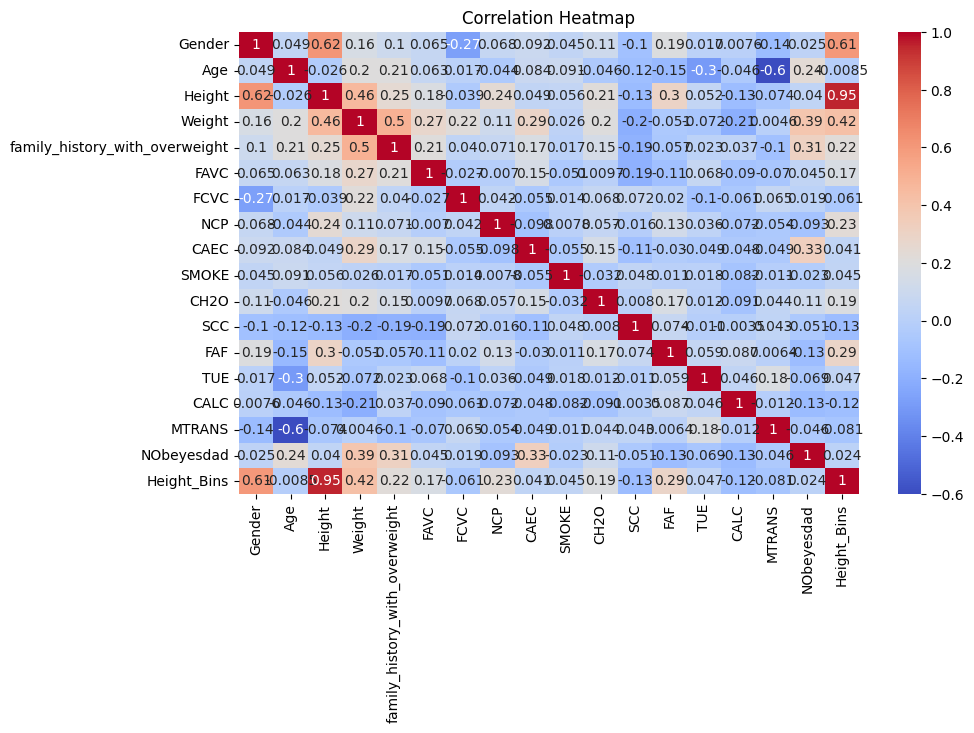

In [ ]:
                                                  # Practical Analytical Questions

# a) Use Python to calculate and display the correlation matrix, and identify potential features relevant for classification

from sklearn.preprocessing import LabelEncoder
# Convert Interval columns into their midpoint
for column in dataSet.columns:
    if isinstance(dataSet[column].iloc[0], pd.Interval):
        dataSet[column] = dataSet[column].apply(lambda x: x.mid)

# Encode categorical columns
label_encoder = LabelEncoder()
for column in dataSet.select_dtypes(include=['object']).columns:
    dataSet[column] = label_encoder.fit_transform(dataSet[column])

# Drop missing values
dataSet = dataSet.dropna()

# Correlation Matrix
correlation_matrix = dataSet.corr()
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#  b) Use Python to find the class distribution of a selected categorical feature and analyze the results.
gender_counts = dataSet["Gender"].value_counts().rename(index={0: "Female", 1: "Male"})# Gender values are encoded as 0 for Female and 1 for Male
print("Class distribution for Gender:")
print(gender_counts)


Class distribution for Gender:
Gender
Male      1068
Female    1043
Name: count, dtype: int64


Analyzing b) The dataset contains 1068 males and 1043 females, indicating a fairly balanced class distribution. This is beneficial for classification tasks, as the model won’t be biased toward one class

In [ ]:
# c) Feature Engineering(BMI shows if a person is skinny or in a healthy wigtht or in obesity)
# Create a new feature BMI = Weight / (Height^2)
dataSet["BMI"] = weight_original / (height_original ** 2)
print("New Feature BMI Created")
print(dataSet)

New Feature BMI Created
      Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62   64.00                            yes   no   2.0   
1     Female   21    1.52   56.00                            yes   no   3.0   
2       Male   23    1.80   77.00                            yes   no   2.0   
3       Male   27    1.80   87.00                             no   no   3.0   
4       Male   22    1.78   89.80                             no   no   2.0   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   21    1.71  131.41                            yes  yes   3.0   
2107  Female   22    1.75  133.74                            yes  yes   3.0   
2108  Female   23    1.75  133.69                            yes  yes   3.0   
2109  Female   24    1.74  133.35                            yes  yes   3.0   
2110  Female   24    1.74  133.47                            yes  yes   3.0   

      NCP       CAEC SMOKE 

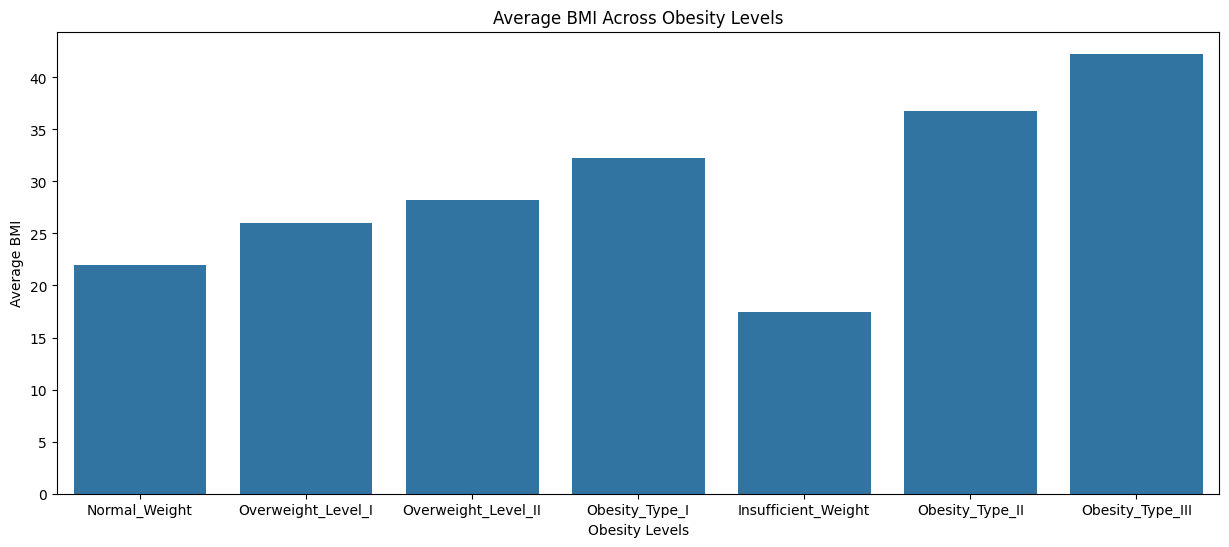

In [ ]:
#related to c)
# Visualizing BMI vs. Obesity levels using a bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x=dataSet["NObeyesdad"], y=dataSet["BMI"], errorbar=None)  # ci=None removes confidence intervals
plt.xlabel("Obesity Levels")
plt.ylabel("Average BMI")
plt.title("Average BMI Across Obesity Levels")
plt.show()
